In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import scipy.stats as stt

# Import and "corrupt" the original dataframe

In [2]:
df0 = pd.read_csv("data/2021_to_2024_pre_election/all_votes.csv", sep=',')

Import the data correctly (i.e. specifying the separator)

In [3]:
# Visualize the dataframe
df0

member.id member.first_name member.last_name member.country.code   
0          840           Charles          GOERENS                 LUX  \
1         1854         Constanze            KREHL                 DEU   
2         1892            Carlos           COELHO                 PRT   
3         1909             Bernd            LANGE                 DEU   
4         1913           Evelyne         GEBHARDT                 DEU   
..         ...               ...              ...                 ...   
774     254719             Vasco  BECKER-WEINBERG                 PRT   
775     254720        Ana Miguel       DOS SANTOS                 PRT   
776     254721            VÃ¢nia             NETO                 PRT   
777     254722          TeÃ³filo           SANTOS                 PRT   
778     254876           Ricardo          MORGADO                 PRT   

    member.country.label member.country.iso_alpha_2 member.group.code   
0             Luxembourg                         LU             RENEW  \
1                Germany                         DE                SD   
2               Portugal                         PT               EPP   
3                Germany                         DE                SD   
4                Germany                         DE                SD   
..                   ...                        ...               ...   
774             Portugal                         PT               EPP   
775             Portugal                         PT               EPP   
776             Portugal                         PT               EPP   
777             Portugal                         PT               EPP   
778             Portugal                         PT               EPP   

                                   member.group.label   
0                                        Renew Europe  \
1    Progressive Alliance of Socialists and Democrats   
2                           European Peopleâs Party   
3    Progressive Alliance of Socialists and Democrats   
4    Progressive Alliance of Socialists and Democrats   
..                                                ...   
774                         European Peopleâs Party   
775                         European Peopleâs Party   
776                         European Peopleâs Party   
777                         European Peopleâs Party   
778                         European Peopleâs Party   

    member.group.short_label        127022  ...        168862        168863   
0                      Renew           FOR  ...           FOR           FOR  \
1                        S&D           FOR  ...           NaN           NaN   
2                        EPP           NaN  ...           FOR       AGAINST   
3                        S&D  DID_NOT_VOTE  ...  DID_NOT_VOTE  DID_NOT_VOTE   
4                        S&D           FOR  ...           NaN           NaN   
..                       ...           ...  ...           ...           ...   
774                      EPP           NaN  ...  DID_NOT_VOTE       AGAINST   
775                      EPP           NaN  ...  DID_NOT_VOTE       AGAINST   
776                      EPP           NaN  ...  DID_NOT_VOTE       AGAINST   
777                      EPP           NaN  ...           FOR       AGAINST   
778                      EPP           NaN  ...  DID_NOT_VOTE       AGAINST   

           168984        169085        169153        169157        169182   
0             FOR           FOR           FOR           FOR           FOR  \
1             NaN           NaN           NaN           NaN           NaN   
2      ABSTENTION           FOR           FOR           FOR           FOR   
3             FOR           FOR           FOR           FOR           FOR   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
774  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE   
7

### Select the variables to study

Node variables

In [4]:
# node variables are all calumns that are numbers

list_of_node_variables = [c for c in df0.columns if c.isdigit()]

df_nodes = df0[list_of_node_variables]

In [5]:
df_nodes

127022        127023        127024        127025        127026   
0             FOR           FOR           FOR    ABSTENTION           FOR  \
1             FOR           FOR           FOR       AGAINST           FOR   
2             NaN           NaN           NaN           NaN           NaN   
3    DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE   
4             FOR           FOR           FOR       AGAINST           FOR   
..            ...           ...           ...           ...           ...   
774           NaN           NaN           NaN           NaN           NaN   
775           NaN           NaN           NaN           NaN           NaN   
776           NaN           NaN           NaN           NaN           NaN   
777           NaN           NaN           NaN           NaN           NaN   
778           NaN           NaN           NaN           NaN           NaN   

           127027        127028        127029        127030 127163  ...   
0             FOR           FOR           FOR           FOR    FOR  ...  \
1             FOR           FOR       AGAINST           FOR    FOR  ...   
2             NaN           NaN           NaN           NaN    NaN  ...   
3    DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE    FOR  ...   
4             FOR    ABSTENTION       AGAINST           FOR    FOR  ...   
..            ...           ...           ...           ...    ...  ...   
774           NaN           NaN           NaN           NaN    NaN  ...   
775           NaN           NaN           NaN           NaN    NaN  ...   
776           NaN           NaN           NaN           NaN    NaN  ...   
777           NaN           NaN           NaN           NaN    NaN  ...   
778           NaN           NaN           NaN           NaN    NaN  ...   

           168862        168863        168984        169085        169153   
0             FOR           FOR           FOR           FOR           FOR  \
1             NaN           NaN           NaN           NaN           NaN   
2             FOR       AGAINST    ABSTENTION           FOR           FOR   
3    DID_NOT_VOTE  DID_NOT_VOTE           FOR           FOR           FOR   
4             NaN           NaN           NaN           NaN           NaN   
..            ...           ...           ...           ...           ...   
774  DID_NOT_VOTE       AGAINST  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE   
775  DID_NOT_VOTE       AGAINST  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE   
776  DID_NOT_VOTE       AGAINST  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE   
777           FOR       AGAINST    ABSTENTION       AGAINST           FOR   
778  DID_NOT_VOTE       AGAINST  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE   

           169157        169182        169187        169197        169252  
0             FOR           FOR           FOR           FOR           FOR  
1             NaN           NaN           NaN           NaN           NaN  
2             FOR           FOR           FOR           FOR           FOR  
3             FOR           FOR           FOR           FOR           FOR  
4             NaN           NaN           NaN           NaN           NaN  
..            ...           ...           ...           ...           ...  
774  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  
775  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  
776  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  
777           FOR           FOR           FOR           FOR           FOR  
778  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  DID_NOT_VOTE  

[779 rows x 1527 columns]

Heat variables

### Consistency

I.e. make the naming of the responses consistent

In [7]:
df_nodes["127022"].unique()

array(['FOR', nan, 'DID_NOT_VOTE', 'AGAINST', 'ABSTENTION'], dtype=object)

# Make the dummy-coded dataframe

In [46]:
df_dummy = pd.DataFrame()
df = df_nodes.copy() # Select the dataframe of the nodes

list_of_columns = df_nodes.columns # here you can select a subset of columns


for col in list_of_columns: # For each column...
    values = (df[col].unique()) # ... get the list of the possible responses (i.e. nodes)
    
    for value in values: # For each response
        if type(value) == str: # check if the answer is type string
            name = str(col)+":"+str(value) # get the names as col:response
            df_dummy[name] = df[col] == value # get dummy-coded column

        else:
                name = str(col)+":"+str(value) 
                df_dummy[name] = df[col] == value


/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/2766754546.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummy[name] = df[col] == value # get dummy-coded column
/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/2766754546.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummy[name] = df[col] == value
/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/2766754546.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.in

In [47]:
df_dummy

127022:FOR  127022:nan  127022:DID_NOT_VOTE  127022:AGAINST   
0          True       False                False           False  \
1          True       False                False           False   
2         False       False                False           False   
3         False       False                 True           False   
4          True       False                False           False   
..          ...         ...                  ...             ...   
774       False       False                False           False   
775       False       False                False           False   
776       False       False                False           False   
777       False       False                False           False   
778       False       False                False           False   

     127022:ABSTENTION  127023:FOR  127023:nan  127023:DID_NOT_VOTE   
0                False        True       False                False  \
1                False        True       False                False   
2                False       False       False                False   
3                False       False       False                 True   
4                False        True       False                False   
..                 ...         ...         ...                  ...   
774              False       False       False                False   
775              False       False       False                False   
776              False       False       False                False   
777              False       False       False                False   
778              False       False       False                False   

     127023:ABSTENTION  127023:AGAINST  ...  169197:FOR  169197:nan   
0                False           False  ...        True       False  \
1                False           False  ...       False       False   
2                False           False  ...        True       False   
3                False           False  ...        True       False   
4                False           False  ...       False       False   
..                 ...             ...  ...         ...         ...   
774              False           False  ...       False       False   
775              False           False  ...       False       False   
776              False           False  ...       False       False   
777              False           False  ...        True       False   
778              False           False  ...       False       False   

     169197:DID_NOT_VOTE  169197:AGAINST  169197:ABSTENTION  169252:FOR   
0                  False           False              False        True  \
1                  False           False              False       False   
2                  False           False              False        True   
3                  False           False              False        True   
4                  False           False              False       False   
..                   ...             ...                ...         ...   
774                 True           False              False       False   
775                 True           False              False       False   
776                 True           False              False       False   
777                False           False              False        True   
778                 True           False              False       False   

     169252:nan  169252:ABSTENTION  169252:AGAINST  169252:DID_NOT_VOTE  
0         False              False           False                False  
1         False              False           False                False  
2         False              False           False                False  
3         False              False           False                False  
4         False              False           False                False  
..          ...                ...             ...                  ...  
774       False              False           False             

# Make the network (complete version)

### Support functions

In [48]:
def phi_(n11,n00,n10,n01):
    n1p = n11+n10
    n0p = n01+n00
    np1 = n01+n11
    np0 = n10+n00
    
    num = n11*n00-n10*n01
    den_ = n1p*n0p*np0*np1
    
    if den_==0:
        phi_=np.nan
    else:
        phi_ = num/np.sqrt(den_)
    return phi_

In [49]:
def p_val(r,L):
    den = np.sqrt(1-r**2)
    deg_free = L-2
    if den==0:
        p = 0
    else:
        num = r*np.sqrt(deg_free)
        t = num/den
        p = stt.t.sf(abs(t), df=deg_free)*2
    return p

In [50]:
def phi(x,y,get_p=False):
    
    m_eq = x==y
    m_diff = np.logical_not(m_eq)
    
    n11 = float(np.sum(x[m_eq]==True))
    n00 = float(np.sum(x[m_eq]==False))
    
    n10 = float(np.sum(x[m_diff]==True))
    n01 = float(np.sum(y[m_diff]==True))
    
    phi_val = phi_(n11,n00,n10,n01)
    
    if get_p:
        p = p_val(phi_val,len(x))
        return phi_val, p
    else:
        return phi_val

### Main function

In [51]:
def make_graph_(df, list_of_nodes, alpha=0.05, get_p=True, remove_nan=False, remove_non_significant=False, exclude_same_question=True, print_=False):
    
    if get_p==False and remove_non_significant==True:
        print("Warning: Setting remove_non_significant to False as get_p is False!")
        remove_non_significant=False
    
    G = nx.Graph()
    
    count = 0
    # only select 700 nodes
    list_of_nodes = list_of_nodes[:300]
    for i, node_i in enumerate(list_of_nodes):
        for j, node_j in enumerate(list_of_nodes):
            
            if j <= i: # do not run the same couple twice
                continue
            
            if print_:
                count += 1
                l = len(list_of_nodes)
                n_tot = l*(l-1)/2
                print(count,"/",n_tot, " = ", np.round(count/n_tot,decimals=2)*100, '%')
                
            basename1 = node_i.split(sep=':')[0]
            basename2 = node_j.split(sep=':')[0]
            
            if exclude_same_question:
                if basename1 == basename2: # if they belong to the same item
                    continue

            # Get the two columns
            c1 = df[node_i]
            c2 = df[node_j]
            
            if remove_nan:
                if ("Ref" in node_i) or ("Ref" in node_j):
                    continue
                
                c1_n = df[basename1+":nan"] # get the refused values of each item
                c2_n = df[basename2+":nan"]
                
                mask = np.logical_not(np.logical_or(c1_n, c2_n)) # get a mask of the refused values
                
                c1 = c1[mask] # select only the non-nan element
                c2 = c2[mask]
            
            if get_p:
                (r,p) = phi(c1,c2, get_p=True)
            else:
                r = phi(c1,c2, get_p=False)
            
            # Check if there are the conditions for drawing a node
            if remove_non_significant: 
                condition = r>0 and p<alpha
            else:
                condition = r>0

            if condition:
                G.add_weighted_edges_from([(node_i,node_j,r)],weight='weight')
                if get_p:
                    G.add_weighted_edges_from([(node_i,node_j,p)],weight='p')
                    sig = float(p<alpha) # Boolean are not accepted as edge weight
                    G.add_weighted_edges_from([(node_i,node_j,sig)],weight='sig')
    return G

### Make the network from the dummy-coded dataframe

In [52]:
# Parameters
remove_nan=False
get_p=True
remove_non_significant=False
alpha=0.05

# get graph without the did not vote
# valid_suffixes = (':FOR', ':AGAINST', ':ABSTENTION')
# filtered_cols = [col for col in df_dummy.columns if col.endswith(valid_suffixes)]
# df_dummy = df_dummy[filtered_cols]

# Get the graph
G = make_graph_(df=df_dummy, list_of_nodes=df_dummy.columns, alpha=alpha, get_p=get_p, remove_non_significant=remove_non_significant, 
                remove_nan=remove_nan, exclude_same_question=True, print_=True)
print("Complete!")

1 / 44850.0  =  0.0 %
2 / 44850.0  =  0.0 %
3 / 44850.0  =  0.0 %
4 / 44850.0  =  0.0 %
5 / 44850.0  =  0.0 %
6 / 44850.0  =  0.0 %
7 / 44850.0  =  0.0 %
8 / 44850.0  =  0.0 %
9 / 44850.0  =  0.0 %
10 / 44850.0  =  0.0 %
11 / 44850.0  =  0.0 %
12 / 44850.0  =  0.0 %
13 / 44850.0  =  0.0 %
14 / 44850.0  =  0.0 %
15 / 44850.0  =  0.0 %
16 / 44850.0  =  0.0 %
17 / 44850.0  =  0.0 %
18 / 44850.0  =  0.0 %
19 / 44850.0  =  0.0 %
20 / 44850.0  =  0.0 %
21 / 44850.0  =  0.0 %
22 / 44850.0  =  0.0 %
23 / 44850.0  =  0.0 %
24 / 44850.0  =  0.0 %
25 / 44850.0  =  0.0 %
26 / 44850.0  =  0.0 %
27 / 44850.0  =  0.0 %
28 / 44850.0  =  0.0 %
29 / 44850.0  =  0.0 %
30 / 44850.0  =  0.0 %
31 / 44850.0  =  0.0 %
32 / 44850.0  =  0.0 %
33 / 44850.0  =  0.0 %
34 / 44850.0  =  0.0 %
35 / 44850.0  =  0.0 %
36 / 44850.0  =  0.0 %
37 / 44850.0  =  0.0 %
38 / 44850.0  =  0.0 %
39 / 44850.0  =  0.0 %
40 / 44850.0  =  0.0 %
41 / 44850.0  =  0.0 %
42 / 44850.0  =  0.0 %
43 / 44850.0  =  0.0 %
44 / 44850.0  =  0.0

Save

In [42]:
filename = 'EP_previous'
nx.write_gexf(G,filename+'.gexf')

# Make heatmap

Make the heatmap using the average

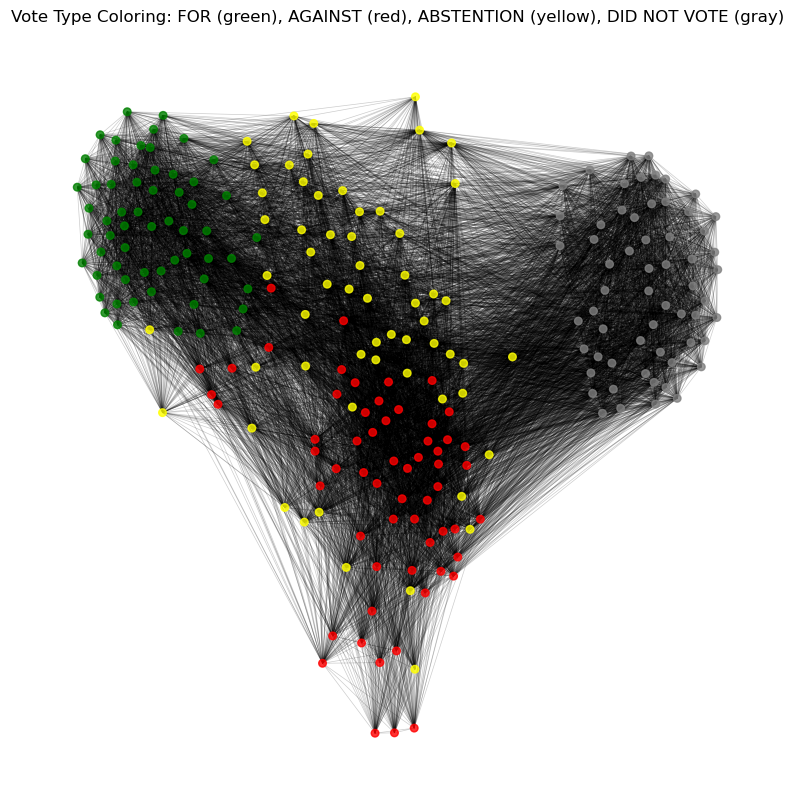

In [53]:
# color nodes based on FOR AGAINST ABSTAIN or DID NOT VOTE: FOR must be green, AGAINST must be red, ABSTAIN must be yellow, DID NOT VOTE must be gray
# =====================================================
# Color nodes based on their vote type: FOR (green), AGAINST (red), ABSTENTION (yellow), DID NOT VOTE (gray)
import matplotlib.pyplot as plt

# Define color mapping
vote_colors = {
    'FOR': 'green',
    'AGAINST': 'red',
    'ABSTENTION': 'yellow',
    'DID_NOT_VOTE': 'gray',
    'nan': 'gray',
    'NaN': 'gray',
    'None': 'gray'
}

def get_vote_type(node_name):
    # node_name is like '127022:FOR' or '127022:AGAINST'
    if ':' in node_name:
        vote_type = node_name.split(':', 1)[1]
        # handle nan/NaN/None
        if vote_type in vote_colors:
            return vote_type
        if vote_type.lower() == 'nan':
            return 'nan'
        if vote_type.lower() == 'none':
            return 'None'
        return vote_type
    return 'DID_NOT_VOTE'

# Assign color to each node
node_colors = []
for n in G.nodes:
    vote_type = get_vote_type(n)
    color = vote_colors.get(vote_type, 'gray')
    node_colors.append(color)

# Draw the network with colored nodes
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=30, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
plt.title("Vote Type Coloring: FOR (green), AGAINST (red), ABSTENTION (yellow), DID NOT VOTE (gray)")
plt.axis('off')
plt.show()


/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/1232586859.py:56: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stt.pearsonr(x[mask], y[mask])
/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/1232586859.py:56: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stt.pearsonr(x[mask], y[mask])
/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/1232586859.py:56: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stt.pearsonr(x[mask], y[mask])
/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/1232586859.py:56: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, p = stt.pearsonr(x[mask], y[mask])
/var/folders/wd/y6168jtx54j31_3xpbpm3srr0000gn/T/ipykernel_89968/1232586859.py:56: ConstantInputWarning: An input array is constant;

                     ThermoRep
127022:FOR           -0.043039
127022:nan                 NaN
127022:DID_NOT_VOTE   0.005244
127022:AGAINST       -0.393928
127022:ABSTENTION     0.496119


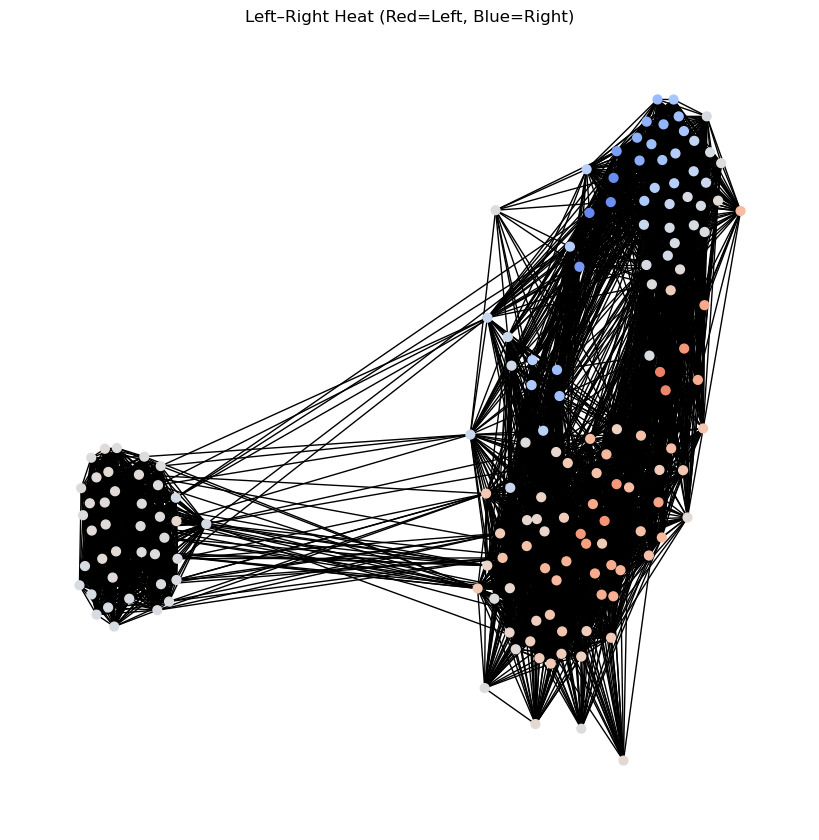

In [43]:
# =====================================================
#  LEFT–RIGHT heat per node using correlation (ResIN style)
# =====================================================

import pandas as pd
import numpy as np
import networkx as nx
from scipy import stats as stt

# 1️⃣  Detect the party/group column in df0
party_candidates = [
    "member.group.short_label", "member.group.label", "member.group.code",
    "party_family", "party", "group_short", "group_label", "group_code",
]
party_col = next((c for c in party_candidates if c in df0.columns), None)
assert party_col is not None, "❌ No party/group column found in df0."

# 2️⃣  Define ideology scores (−1 = left ... +1 = right)
party_axis = {
    "GUE/NGL": -1.0, "The Left": -1.0,
    "Greens/EFA": -0.8, "Greens/European Free Alliance": -0.8,
    "S&D": -0.6, "SD": -0.6,
    "Renew": -0.2, "RENEW": -0.2, "Renew Europe": -0.2,
    "EPP": 0.4, "European People’s Party": 0.4, "European People\u2019s Party": 0.4,
    "ECR": 0.7, "European Conservatives and Reformists": 0.7,
    "PFE": 0.9, "Patriots for Europe": 0.9,
    "ESN": 0.8, "Europe of Sovereign Nations": 0.8,
    "ID": 1.0, "Identity & Democracy": 1.0,
    "NI": 0.0, "Non-attached": 0.0,
}

# 3️⃣  Align df0 with df_dummy (same MEP order)
if df0.index.name == df_dummy.index.name and df0.index.isin(df_dummy.index).any():
    mep_party = df0[party_col]
elif "mep_id" in df0.columns and df_dummy.index.name == "mep_id":
    mep_party = df0.set_index("mep_id")[party_col]
else:
    mep_party = df0[party_col]

common_ids = df_dummy.index.intersection(mep_party.index)
X = df_dummy.loc[common_ids].fillna(False).astype(bool)
parties = mep_party.loc[common_ids].astype(str)

# 4️⃣  Build MEP-level heat vector (ideology score per MEP)
mep_heat = parties.map(party_axis).astype(float)
mep_heat = mep_heat.where(~mep_heat.isna(), 0.0)  # treat unknown as neutral (0.0)

# 5️⃣  Define correlation helper (ignore NaNs)
def corr_nan(x, y):
    """Compute Pearson r, ignoring NaN values."""
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    mask = ~np.isnan(x) & ~np.isnan(y)
    if mask.sum() < 3:
        return (0.0, 1.0)
    r, p = stt.pearsonr(x[mask], y[mask])
    return (r, p)

# 6️⃣  Compute correlation of each node’s endorsement pattern with ideology
dic_r = {}
type_ = "standard"  # "standard" for real r, "sign" for ±1 only

for node in X.columns:
    col_node = X[node].astype(float)  # 0/1 per MEP
    r, p = corr_nan(col_node, mep_heat)
    dic_r[node] = np.sign(r) if type_ == "sign" else r

# 7️⃣  Attach as node attribute in your network
nx.set_node_attributes(G, dic_r, "ThermoRep_mean")

# 8️⃣  Optional: inspect or save
df_heat = pd.DataFrame.from_dict(dic_r, orient="index", columns=["ThermoRep"])
print(df_heat.head())

# # 9️⃣  Optional: visualize (red = left, blue = right)
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

norm = mcolors.Normalize(vmin=-1, vmax=1)
cmap = plt.cm.coolwarm
colors = [cmap(norm(df_heat.loc[n, "ThermoRep"])) if n in df_heat.index else (0.8, 0.8, 0.8) for n in G.nodes()]

plt.figure(figsize=(8, 8))
nx.draw(G, node_color=colors, node_size=40, with_labels=False)
plt.title("Left–Right Heat (Red=Left, Blue=Right)")
plt.axis("off")
plt.show()

In [44]:
filename = 'EP_previous_final'
nx.write_gexf(G,filename+'.gexf')

In [27]:
df_dummy

127022:FOR  127022:AGAINST  127022:ABSTENTION  127023:FOR   
0          True           False              False        True  \
1          True           False              False        True   
2         False           False              False       False   
3         False           False              False       False   
4          True           False              False        True   
..          ...             ...                ...         ...   
774       False           False              False       False   
775       False           False              False       False   
776       False           False              False       False   
777       False           False              False       False   
778       False           False              False       False   

     127023:ABSTENTION  127023:AGAINST  127024:FOR  127024:ABSTENTION   
0                False           False        True              False  \
1                False           False        True              False   
2                False           False       False              False   
3                False           False       False              False   
4                False           False        True              False   
..                 ...             ...         ...                ...   
774              False           False       False              False   
775              False           False       False              False   
776              False           False       False              False   
777              False           False       False              False   
778              False           False       False              False   

     127024:AGAINST  127025:ABSTENTION  ...  169182:AGAINST  169187:FOR   
0             False               True  ...           False        True  \
1             False              False  ...           False       False   
2             False              False  ...           False        True   
3             False              False  ...           False        True   
4             False              False  ...           False       False   
..              ...                ...  ...             ...         ...   
774           False              False  ...           False       False   
775           False              False  ...           False       False   
776           False              False  ...           False       False   
777           False              False  ...           False        True   
778           False              False  ...           False       False   

     169187:AGAINST  169187:ABSTENTION  169197:FOR  169197:AGAINST   
0             False              False        True           False  \
1             False              False       False           False   
2             False              False        True           False   
3             False              False        True           False   
4             False              False       False           False   
..              ...                ...         ...             ...   
774           False              False       False           False   
775           False              False       False           False   
776           False              False       False           False   
777           False              False        True           False   
778           False              False       False           False   

     169197:ABSTENTION  169252:FOR  169252:ABSTENTION  169252:AGAINST  
0                False        True              False           False  
1                False       False              False           False  
2                False        True              False           False  
3                False        True              False           False  
4                False       False              False           False  
..                 ...         ...                ...             ...  
774              False       False              False           False  
775              

### Manually exploring the network

In [ ]:
node1 = "127022:ABSTENTION"
node2 = "127022:AGAINST"
G.get_edge_data(node1,node2)

In [30]:
(node1, node2) in G.edges

False

In [31]:
G.edges(node1, data=True)

EdgeDataView([('127022:ABSTENTION', '127023:AGAINST', {'weight': 0.47368293138871964, 'p': 8.106000163973187e-45, 'sig': 1.0}), ('127022:ABSTENTION', '127024:ABSTENTION', {'weight': 0.21135902399359527, 'p': 2.567475361554632e-09, 'sig': 1.0}), ('127022:ABSTENTION', '127025:FOR', {'weight': 0.3787338489418591, 'p': 5.643148051817915e-28, 'sig': 1.0}), ('127022:ABSTENTION', '127026:FOR', {'weight': 0.1401128271420514, 'p': 8.719202980153642e-05, 'sig': 1.0}), ('127022:ABSTENTION', '127027:AGAINST', {'weight': 0.5776923570146366, 'p': 1.521608379460475e-70, 'sig': 1.0}), ('127022:ABSTENTION', '127027:ABSTENTION', {'weight': 0.2884776150597136, 'p': 2.1412355633932148e-16, 'sig': 1.0}), ('127022:ABSTENTION', '127028:ABSTENTION', {'weight': 0.2794999905174921, 'p': 1.9046609967268965e-15, 'sig': 1.0}), ('127022:ABSTENTION', '127028:AGAINST', {'weight': 0.27302597197434725, 'p': 8.771785340657906e-15, 'sig': 1.0}), ('127022:ABSTENTION', '127029:ABSTENTION', {'weight': 0.5807960951553134, 'p

### Finding the x and y component of the nodes

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [34]:
pos = nx.spring_layout(G,iterations=5000) # Get the positions with the spring layout

# Restructure the data type
pos2 = [[],[]]
key_list = [] # ordered list of the nodes
for key in pos:
    pos2[0].append(pos[key][0])
    pos2[1].append(pos[key][1])
    key_list.append(key)

# Use PCA to rotate the network in such a way that the x-axis is the main one
pos3 = []
for key in pos:
    pos3.append([pos[key][0],pos[key][1]])

pca = PCA(n_components=2)
pca.fit(pos3)
x_pca = pca.transform(pos3)

# Get the x and y position of each node
xx = x_pca[:,0]
yy = x_pca[:,1]

KeyboardInterrupt: 

Correlation between x coordinate and feeling thermometer

In [ ]:
dict_term = nx.get_node_attributes(G,"ThermoRep_mean") # get the feeling thermo
thermo = [dict_term[key] for key in key_list]
stt.spearmanr(xx,thermo)

SignificanceResult(statistic=-0.3066807313642757, pvalue=0.005659656957692213)

# Quantitative analysis of clusters

In [ ]:
clust1 = ["environment:More_regul++",
"environment:More_regul+",
"abortion:always",
"income:favor",
"immigrants:Allow",
"welfare:increased",
"gay:can_marry",
"gun:More_diffic",
"black:Help++",
"black:Help+"]

clust2 = ["welfare:decreased",
'abortion:spec.Cases',
'income:neither',
'income:oppose',
'immigrants:sendBack',
'immigrants:GuestProgram',
'gay:no_recognition',
'gay:civ.union',
'environment:Less_regul++',
'environment:neut',
'environment:Less_regul',
'environment:Less_regul+',
'gun:Same',
'gun:Easier',
'black:NoHelp++',
'black:NoHelp+',
'black:NoHelp',
'abortion:Never',
'abortion:in_Need']


In [ ]:
def get_mean_corr(df_,cl):
    corrs = []
    for i1, el1 in enumerate(cl):
        for i2, el2 in enumerate(cl):
            if i1>i2:
                line1 = df_[el1]
                line2 = df_[el2]
                r = phi(line1,line2, get_p=False)
                corrs.append(r)
    return np.mean(corrs)

In [ ]:
print("Coherence clust 1: ", get_mean_corr(df_dummy, clust1))
print("Coherence clust 2: ", get_mean_corr(df_dummy, clust2))

KeyError: 'environment:More_regul+'

### Bootstrap it!

In [ ]:
N_rep = 100

M1 = []
M2 = []

df_len = len(df_dummy)

for i in range(N_rep):
    
    index_t = (np.random.rand(df_len)*(df_len-1)).astype(int) # generate the list
    
    df_t = df_dummy.iloc[index_t]
    
    m1 = get_mean_corr(df_t, clust1)
    m2 = get_mean_corr(df_t, clust2)
    
    M1.append(m1)
    M2.append(m2)

In [ ]:
# Print the 10-90 % interval
print("Clust1: ", np.round(np.percentile(M1,10),3), "-", np.round(np.percentile(M1,90),3))
print("Clust2: ", np.round(np.percentile(M2,10),3), "-", np.round(np.percentile(M2,90),3))

Clust1:  0.203 - 0.211
Clust2:  0.069 - 0.072


In [ ]:
tests = np.array(M1)>np.array(M2)
np.sum(tests)/len(tests)

1.0

In [ ]:
tests = np.array(M1)<=np.array(M2)
np.sum(tests)/len(tests)

0.0